In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
df= pd.read_csv("marital status.csv")

In [150]:
df.shape

(20, 2)

In [151]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [152]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [153]:
fill= df['status'].median()

In [154]:
fill

0.0

In [155]:
df.status = df.status.fillna(fill)

In [156]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [157]:
df.isnull().sum()

age       0
status    0
dtype: int64

In [158]:
df['status'].value_counts()

0.0    11
1.0     9
Name: status, dtype: int64

In [159]:
X = df[['age']]

In [160]:
X

,age
0,21
1,33
2,24
3,28
4,17
5,33
6,23
7,30
8,29
9,22


In [161]:
y= df['status']

In [162]:
y

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    1.0
Name: status, dtype: float64

In [163]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)


In [164]:
#Train Model 
from sklearn.linear_model import LogisticRegression
r=LogisticRegression()
r.fit(X_train, y_train)

#predict
pred=r.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [165]:
r.score(X_test,y_test)

1.0

In [137]:
r.predict_proba(X_test)

array([[0.48097124, 0.51902876],
       [0.58414972, 0.41585028],
       [0.5242746 , 0.4757254 ],
       [0.49829471, 0.50170529],
       [0.51562228, 0.48437772],
       [0.42943818, 0.57056182]])

In [183]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [184]:
accuracy_score(y_test,pred)

1.0

In [185]:
cnf_matrix=confusion_matrix(y_test,pred)
cnf_matrix

array([[3, 0],
       [0, 3]])

In [186]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



Text(0.5, 257.44, 'Predicted label')

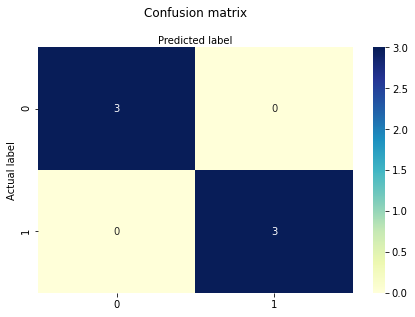

In [187]:

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')